<a href="https://colab.research.google.com/github/AhmedGehad1/AhmedGehad1/blob/main/Copy_of_PipLine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install missforest dython lightgbm imblearn openpyxl

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from dython import nominal
from scipy.stats import pointbiserialr, chi2_contingency
import seaborn as sns
from missforest import MissForest
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTETomek

In [ ]:
# Load the CSV file
df = pd.read_excel('/content/Graduation_project (4).xlsx')

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_excel('Graduation_project (4).xlsx')

Saving Graduation_project (4) (2).xlsx to Graduation_project (4) (2).xlsx


In [ ]:
df.duplicated().sum()

np.int64(4)

In [ ]:
df.drop_duplicates(keep='first', inplace=True)


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
formatted_percentage = missing_percentage.apply(lambda x: f'{x:.2f}%')

# Display the formatted percentages
print(formatted_percentage)


ID                                       0.00%
Age                                      1.28%
Menopausal_status                       20.29%
Weight                                  62.13%
Height.m.                               20.29%
BMI                                     59.95%
pastDM                                   0.00%
pastHypertension                         0.00%
pastCardiac                              0.00%
pastLiver                                0.00%
pastRenalproblems                        0.00%
pastScrewsandplatel                      0.00%
Laterality                               0.00%
T                                       29.08%
N                                       29.15%
M                                        0.00%
Specimen                                 0.00%
Specimen_type                            0.68%
Lymph_node.1                            20.29%
Lymph_node                              63.26%
Peritumoural.lymphovascular.invasion    28.40%
chemotherapy 

In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['ID', 'Weight', 'Height.m.', 'Specimen'])

print(f"\nTotal missing values before imputation: {df.isnull().sum().sum()}")
print(df.dtypes)
print("-" * 50)

# Label encoding
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == bool:  # Check if the column is of type object (categorical)
        df[col] = df[col].replace({
            'yes': 1, 'no': 0, 'Yes': 1, 'No': 0, 'TRUE': 1, 'FALSE': 0,
            'Premenopausal': 0, 'Postmenopausal': 1,
            'M0': 0, 'M1': 1, 'MRM': 2, 'Conservative': 1, 'Present': 2, 'suspicious': 1, 'Absent': 0,
              # Handle suspicious as 0.5
            'T0': 0, 'Tis': 1, 'T1': 2, 'T2': 3, 'T3': 4, 'T4': 5,
            'N0': 0, 'N1': 1, 'N2': 2, 'N3': 3, 'Right':0 , 'Left':0, 'Bilateral':1
        })

# df["Laterality"] = df["Laterality"].map({"Right": 0, "Left": 0, "Bilateral": 2})
df["Lymph_node"] = df["Lymph_node"].map({"SLNB": 0, "AxillaryDissection(ALND)": 1, "AxillaryLymphNodeSampling": 2, "SLNB&Non-SLNB": 3})
print(df.head())
print(df.dtypes)
print("-" * 50)

categorical_features = [
    'Laterality', 'Lymph_node', 'Menopausal_status', 'pastDM', 'pastHypertension',
    'pastCardiac', 'pastLiver', 'pastRenalproblems', 'pastScrewsandplatel', 'T', 'N', 'M',
    'Specimen_type', 'Peritumoural.lymphovascular.invasion', 'chemotherapy', 'Radiotherapy',
    'Hormanal', 'Pain', 'Tenderness', 'Stiffness', 'Weakness', 'Referralpain', 'Swelling', 'lymphedema'
    ,'Lymph_node.1'
]
# Instantiate the MissForest imputer
mf_imputer = MissForest(clf=RandomForestClassifier(n_jobs=-1),
                        rgr=RandomForestRegressor(n_jobs=-1),
                        categorical=categorical_features,  max_iter=50)

# 5. Fit the imputer to the data and transform (impute) it
print("Starting MissForest imputation ...")
df_imputed_array = mf_imputer.fit_transform(df)
print("Imputation complete.")
print("-" * 50)

# 6. Convert the result back to a Pandas DataFrame
df_imputed = pd.DataFrame(df_imputed_array, columns=df.columns)

# Check if any missing values remain (should be 0)
missing_after = df_imputed.isnull().sum().sum()
print(f"\nTotal missing values after imputation: {missing_after}")
print("-" * 50)

# Normalize Data
scaler = MinMaxScaler()
df_imputed[['Age', 'BMI']] = scaler.fit_transform(df_imputed[['Age', 'BMI']])


<ipython-input-9-ef73c28a9dd6>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "



Total missing values before imputation: 3359
Age                                     float64
Menopausal_status                        object
BMI                                     float64
pastDM                                   object
pastHypertension                         object
pastCardiac                              object
pastLiver                                object
pastRenalproblems                        object
pastScrewsandplatel                      object
Laterality                               object
T                                        object
N                                        object
M                                        object
Specimen_type                            object
Lymph_node.1                            float64
Lymph_node                               object
Peritumoural.lymphovascular.invasion     object
chemotherapy                             object
Radiotherapy                             object
Hormanal                                 o

 98%|█████████▊| 49/50 [07:45<00:09,  9.32s/it]/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:285: UserWarning: Both PFC and NRMSE have increased.
  warnings.warn("Both PFC and NRMSE have increased.")
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:453: UserWarning: Stopping criterion triggered during fitting. Before last imputation matrix will be returned.
  warnings.warn(
 98%|█████████▊| 49/50 [07:54<00:09,  9.67s/it]
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the

In [ ]:
# ***SAVE IMPUTED DATA HERE***
df_imputed.to_excel("Imputed_Data.xlsx", index=False)
print("✅ Imputed data saved as 'Imputed_Data.xlsx'")

In [ ]:
# # Fill missing Specimen_type with a placeholder
# df['Specimen_type'] = df['Specimen_type'].fillna('No')

# # Convert 'yes'/'no' and True/False to 1/0
# for col in df.columns:
#     # note we check 'Premenopausal': 0, 'Postmenopausal': 1 is okay as it's a binary thing
#     if df[col].dtype == 'object':
#         df[col] = df[col].replace({'yes': 1, 'no': 0, 'Yes': 1, 'No': 0, 'TRUE': 1, 'FALSE': 0, 'Premenopausal': 0, 'Postmenopausal': 1,
#                                    'M0': 0, 'M1': 1, 'MRM': 1, 'Conservative': 1, 'Present': 1, 'Absent': 0, 'suspicious': 0.5,
#                                     # don't delete this *.*
#                                     'T0': 0, 'Tis': 1, 'T1': 2, 'T2': 3, 'T3': 4, 'T4': 5,
#                                       'N0': 0, 'N1': 1, 'N2': 2, 'N3': 3})
#     elif df[col].dtype == 'bool':
#         df[col] = df[col].astype(int)  # True -> 1, False -> 0


# # Verify conversion
# df.head()
# df.dtypes

In [ ]:
# # Step 1: Identify categorical and numeric columns
# categorical_cols = df.select_dtypes(include=['object', 'category']).columns
# numeric_cols = df.select_dtypes(include=['number']).columns

# # Step 2: Label encode categorical columns
# label_encoders = {}
# for col in categorical_cols:
#     le = LabelEncoder()
#     df[col] = df[col].astype(str)  # Ensure all values are strings for encoding
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

# # Step 3: Apply MICE imputation to the entire dataset
# mice = IterativeImputer(random_state=0, add_indicator=False)
# df_imputed_array = mice.fit_transform(df)

# df_imputed = pd.DataFrame(df_imputed_array, columns=df.columns)

# # Preview the imputed DataFrame
# df_imputed.head()

In [ ]:
# print(df_imputed[['N', 'T']])

In [ ]:
# # Round and clip to ensure values are valid
# df_imputed['N'] = df_imputed['N'].round().clip(lower=0, upper=3).astype(int)
# df_imputed['N']

In [ ]:
# df_imputed['T'] = df_imputed['T'].round().clip(lower=0, upper=5).astype(int)


In [ ]:
df_imputed.head()

In [ ]:
print(df_imputed.isnull().sum())


In [ ]:
# # Normalize 'Age' and 'BMI' features
# scaler = MinMaxScaler()
# df_imputed[['Age', 'BMI']] = scaler.fit_transform(df[['Age', 'BMI']])

In [ ]:
Numerical_Features = df_imputed.select_dtypes(include = ['float', 'int']).columns.tolist()
correlation_matrix = df_imputed[Numerical_Features].corr()
# Display the correlation matrix
print(correlation_matrix)

In [ ]:
# Note select the numerical features only
Numerical_Features = df.select_dtypes(include = ['float']).columns.tolist()
for Feature in Numerical_Features:
    sns.boxplot(df_imputed[Feature]).set(xlabel = Feature) #display boxplot of the numerical variable
    plt.show()

In [ ]:
# Calculate correlation matrix
corr_matrix = df_imputed.corr(numeric_only=True)  # Use numeric_only to avoid object/categorical errors

# Set up the matplotlib figure
plt.figure(figsize=(25, 20))

# Create heatmap with annotations
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)

plt.title("Correlation Heatmap of Dataset", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Convert features stored as objects that should be numeric
for col in df_imputed.columns:
    if col == 'lymphedema':
        continue
    # # If the column isn't numeric, try to convert it to numeric (if possible)
    # if not pd.api.types.is_numeric_dtype(df_imputed[col]):
    #     try:
    #         df_imputed[col] = pd.to_numeric(df_imputed[col], errors='coerce')
    #     except Exception as e:
    #         print(f"Could not convert {col}: {e}")

# Define Cramér's V function for categorical associations
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Apply bias correction
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

target = 'lymphedema'
results = {}

# Iterate over each feature column (excluding the target)
for col in df_imputed.columns:
    if col == target:
        continue
    # For numeric features (now ensured to be numeric)
    if pd.api.types.is_numeric_dtype(df_imputed[col]):
        try:
            corr, _ = pointbiserialr(df_imputed[target], df_imputed[col])
            results[col] = corr
        except Exception as e:
            print(f"Error computing pointbiserialr for {col}: {e}")
    else:
        # For non-numeric features, compute Cramér's V
        results[col] = cramers_v(df[col], df[target])

# Convert results to a DataFrame for visualization
corr_df = pd.DataFrame.from_dict(results, orient='index', columns=['Association'])
corr_df = corr_df.sort_values(by='Association', ascending=False)

# Plot the associations
plt.figure(figsize=(15, 6))
sns.barplot(x=corr_df.index, y='Association', data=corr_df)
plt.xticks(rotation=40, ha='right')
plt.title('Association between Each Feature and Lymphedema')
plt.ylabel('Correlation / Association Measure')
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv("Graduation_project_final.csv", index=False)

# Load dataset
xls = pd.ExcelFile("/content/Imputed_Data.xlsx")
sheet_to_use = xls.sheet_names[0]
df = pd.read_excel(xls, sheet_name=sheet_to_use)
target_col = 'lymphedema'

In [ ]:
# Load dataset
xls = pd.ExcelFile("/content/Imputed_Data.xlsx")
sheet_to_use = xls.sheet_names[0]
df = pd.read_excel(xls, sheet_name=sheet_to_use)
target_col = 'lymphedema'


# # Encode categorical features
# encoders = {}
# for col in df.select_dtypes(include='object').columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col].astype(str))
#     encoders[col] = le

# Separate classes
minority_class = df[df[target_col] == 1]
majority_class = df[df[target_col] == 0]

# Normalize minority class
scaler = MinMaxScaler()
minority_scaled = scaler.fit_transform(minority_class.drop(columns=[target_col]))

# GAN Models
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim),
            nn.Sigmoid()
        )
    def forward(self, z):
        return self.model(z)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

# Setup
input_dim = 32
output_dim = minority_scaled.shape[1]
G = Generator(input_dim, output_dim)
D = Discriminator(output_dim)

criterion = nn.BCELoss()
G_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)
D_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)

minority_tensor = torch.tensor(minority_scaled, dtype=torch.float32)
epochs = 1000
batch_size = 64

# GAN Training
for epoch in range(epochs):
    idx = np.random.randint(0, minority_tensor.shape[0], batch_size)
    real_data = minority_tensor[idx]
    real_labels = torch.ones((batch_size, 1))

    z = torch.randn(batch_size, input_dim)
    fake_data = G(z)
    fake_labels = torch.zeros((batch_size, 1))

    D_optimizer.zero_grad()
    D_loss = criterion(D(real_data), real_labels) + criterion(D(fake_data.detach()), fake_labels)
    D_loss.backward()
    D_optimizer.step()

    G_optimizer.zero_grad()
    z = torch.randn(batch_size, input_dim)
    fake_data = G(z)
    G_loss = criterion(D(fake_data), real_labels)
    G_loss.backward()
    G_optimizer.step()

# Generate synthetic data
n_generate = len(majority_class) - len(minority_class)
z = torch.randn(n_generate, input_dim)
generated = G(z).detach().numpy()
generated_rescaled = scaler.inverse_transform(generated)

# Build synthetic DataFrame
synthetic_df = pd.DataFrame(generated_rescaled, columns=minority_class.columns[:-1])
synthetic_df[target_col] = 1

# Combine original + synthetic
df_combined = pd.concat([df, synthetic_df], ignore_index=True)

# # Decode categorical features
# for col in encoders:
#     df_combined[col] = df_combined[col].astype(int)
#     df_combined[col] = encoders[col].inverse_transform(df_combined[col])

# Save the balanced dataset
df_combined.to_excel("lymphedema_balanced_gan.xlsx", index=False)
print("✅ Balanced dataset saved as 'lymphedema_balanced_gan.xlsx'")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_target_distribution(y_before, y_after):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    for ax, y, title in zip(axes,
                            [y_before, y_after],
                            ["Before", "After"]):
        ax.set_title(title)
        sns.countplot(x=y, ax=ax, palette='viridis')
        ax.set_xlabel("Lymphedema")
        ax.set_ylabel("Count")

        total = len(y)
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{(height / total * 100):.1f}%',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

# Example usage:
plot_target_distribution(df["lymphedema"], df_combined["lymphedema"])


In [ ]:
# Load Excel and select sheet
excel_path = "/content/Imputed_Data.xlsx"
xls = pd.ExcelFile(excel_path)
sheet_name = "in" if "in" in xls.sheet_names else xls.sheet_names[0]
df = pd.read_excel(excel_path, sheet_name=sheet_name)

# # Encode categorical features
# encoders = {}
# for col in df_features.select_dtypes(include='object').columns:
#     le = LabelEncoder()
#     df_features[col] = le.fit_transform(df_features[col].astype(str))
#     encoders[col] = le

# # Separate features and target
# X = df_features.drop(columns=['lymphedema'])
# y = df_features['lymphedema']

# Separate features and target
y = df['lymphedema']
X = df.drop(columns=['lymphedema'])

# Apply SMOTE-Tomek
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X, y)

# Reconstruct the balanced DataFrame
df_balanced = X_resampled.copy()
df_balanced['lymphedema'] = y_resampled

# # Decode categorical columns
# for col in encoders:
#     df_balanced[col] = df_balanced[col].astype(int)
#     df_balanced[col] = encoders[col].inverse_transform(df_balanced[col])

# Save to Excel
output_path = "/content/imputed_data_smote_tomek.xlsx"
df_balanced.to_excel(output_path, index=False)
print(f"✅ Balanced dataset saved to 'lymphedema_balanced_smote_tomek.xlsx")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_target_distribution(y_before, y_after, title_before="Before", title_after="After"):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    for ax, y, title in zip(axes,
                            [y_before, y_after],
                            [title_before, title_after]):
        ax.set_title(title)
        sns.countplot(x=y, ax=ax, palette='coolwarm')
        ax.set_xlabel("Lymphedema")
        ax.set_ylabel("Count")

        total = len(y)
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{(height / total * 100):.1f}%',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

# Plot for SMOTE-Tomek
print("📊 SMOTE-Tomek Balancing Visualization")
plot_target_distribution(df["lymphedema"], df_balanced["lymphedema"], "Before SMOTE-Tomek", "After SMOTE-Tomek")

# Plot for GAN
print("📊 GAN Balancing Visualization")
plot_target_distribution(df["lymphedema"], df_combined["lymphedema"], "Before GAN", "After GAN")


In [ ]:
# Replace 'file_path1.xlsx' and 'file_path2.xlsx' with the actual file paths in your Google Drive
file_path1 = '/content/Graduation_project (4).xlsx'
file_path2 = '/content/Imputed_Data.xlsx'

df1 = pd.read_excel(file_path1)
df2 = pd.read_excel(file_path2)

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot on the first subplot (axes[0])
sns.histplot(df1['Age'], bins=30, ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Age Distribution (df1)')
axes[0].grid(True)

# Plot on the second subplot (axes[1])
sns.histplot(df2['Age'], bins=30, ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Age Distribution (df2)')
axes[1].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

# Calculate and display missing percentages for df1
missing_percentage_df1 = (df1['Age'].isnull().sum() / len(df1)) * 100
formatted_percentage_df1 = f'{missing_percentage_df1:.2f}%'
print(f"Missing Percentage in df1: {formatted_percentage_df1}")

# Calculate and display missing percentages for df2
missing_percentage_df2 = (df2['Age'].isnull().sum() / len(df2)) * 100
formatted_percentage_df2 = f'{missing_percentage_df2:.2f}%'
print(f"Missing Percentage in df2: {formatted_percentage_df2}")

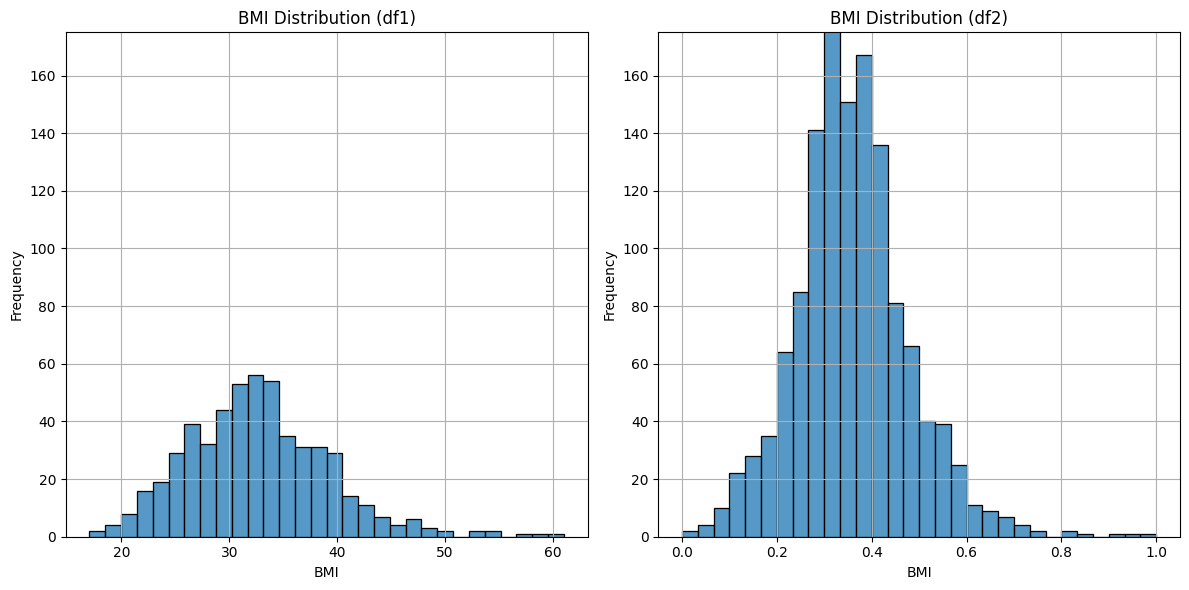

Missing Percentage in df1: 59.85%
Missing Percentage in df2: 0.00%


In [ ]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot on the first subplot (axes[0])
sns.histplot(df1['BMI'], bins=30, ax=axes[0])
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Frequency')
axes[0].set_title('BMI Distribution (df1)')
axes[0].grid(True)
axes[0].set_ylim(0, 175)  # Set y-axis limit to 175

# Plot on the second subplot (axes[1])
sns.histplot(df2['BMI'], bins=30, ax=axes[1])
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Frequency')
axes[1].set_title('BMI Distribution (df2)')
axes[1].grid(True)
axes[1].set_ylim(0, 175)  # Set y-axis limit to 175

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

# Calculate and display missing percentages for df1
missing_percentage_df1 = (df1['BMI'].isnull().sum() / len(df1)) * 100
formatted_percentage_df1 = f'{missing_percentage_df1:.2f}%'
print(f"Missing Percentage in df1: {formatted_percentage_df1}")

# Calculate and display missing percentages for df2
missing_percentage_df2 = (df2['BMI'].isnull().sum() / len(df2)) * 100
formatted_percentage_df2 = f'{missing_percentage_df2:.2f}%'
print(f"Missing Percentage in df2: {formatted_percentage_df2}")

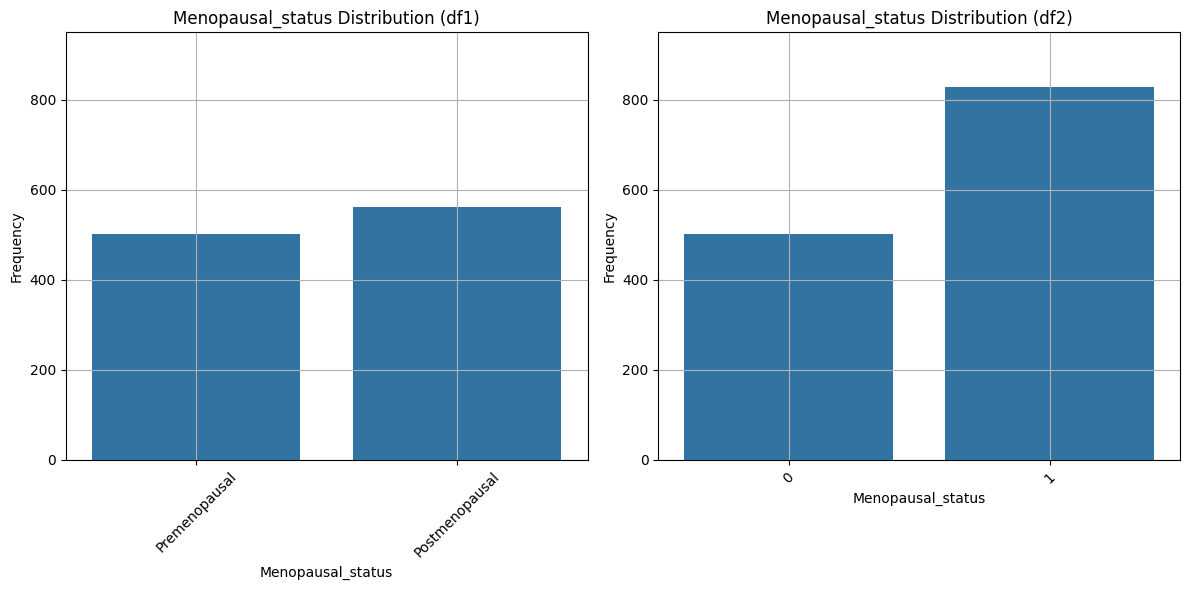

Missing Percentage in df1 for Menopausal_status: 20.30%
Missing Percentage in df2 for Menopausal_status: 0.00%


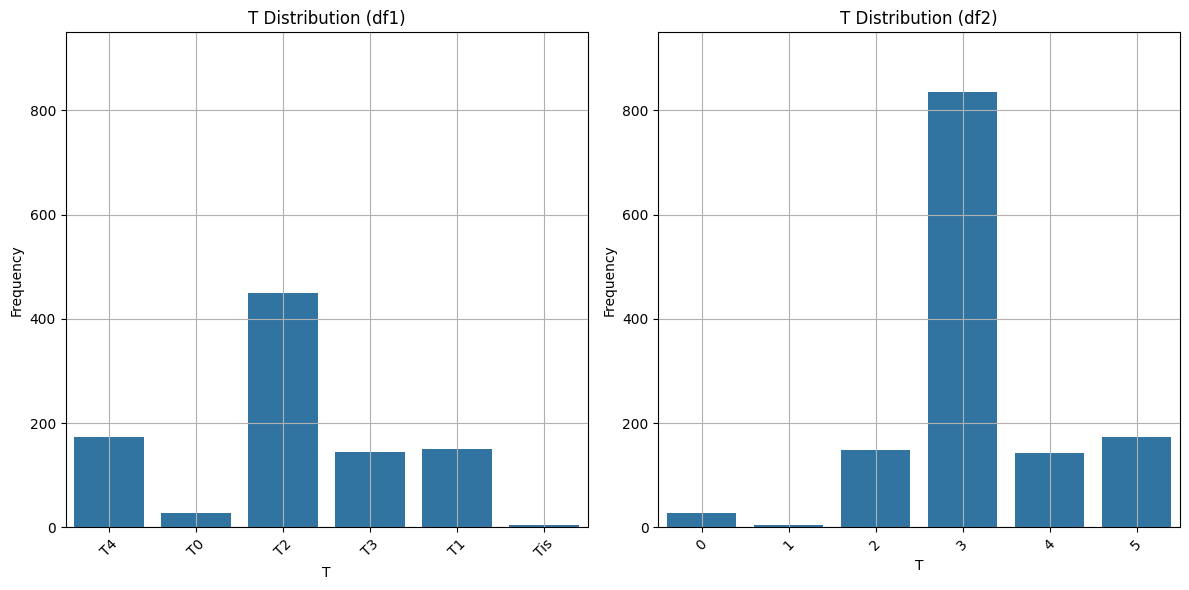

Missing Percentage in df1 for T: 28.99%
Missing Percentage in df2 for T: 0.00%


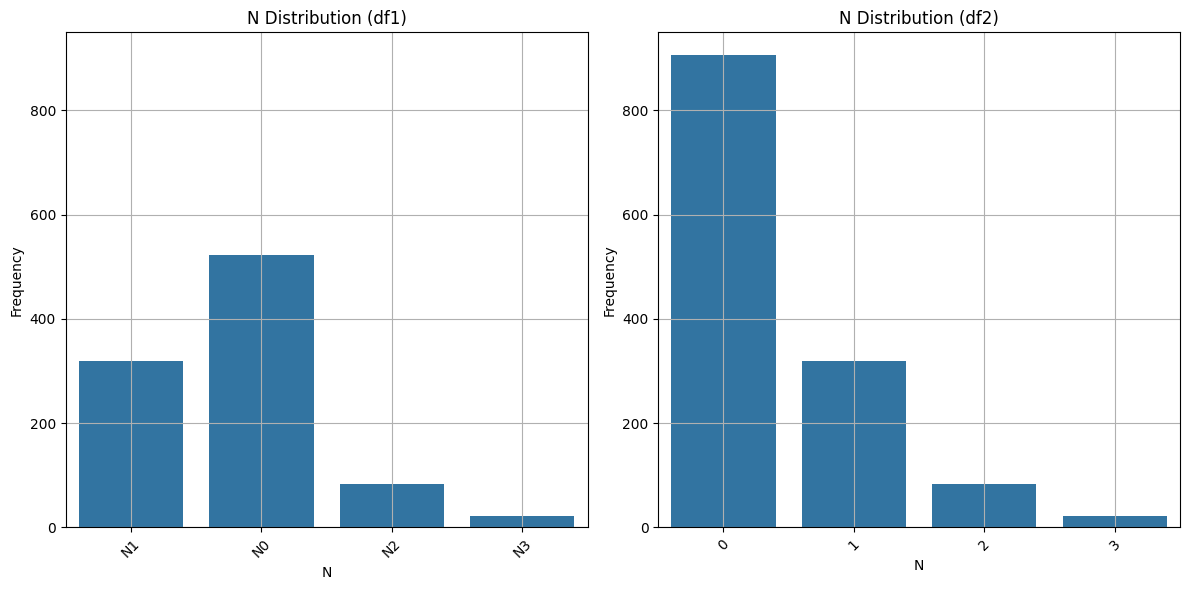

Missing Percentage in df1 for N: 29.06%
Missing Percentage in df2 for N: 0.00%


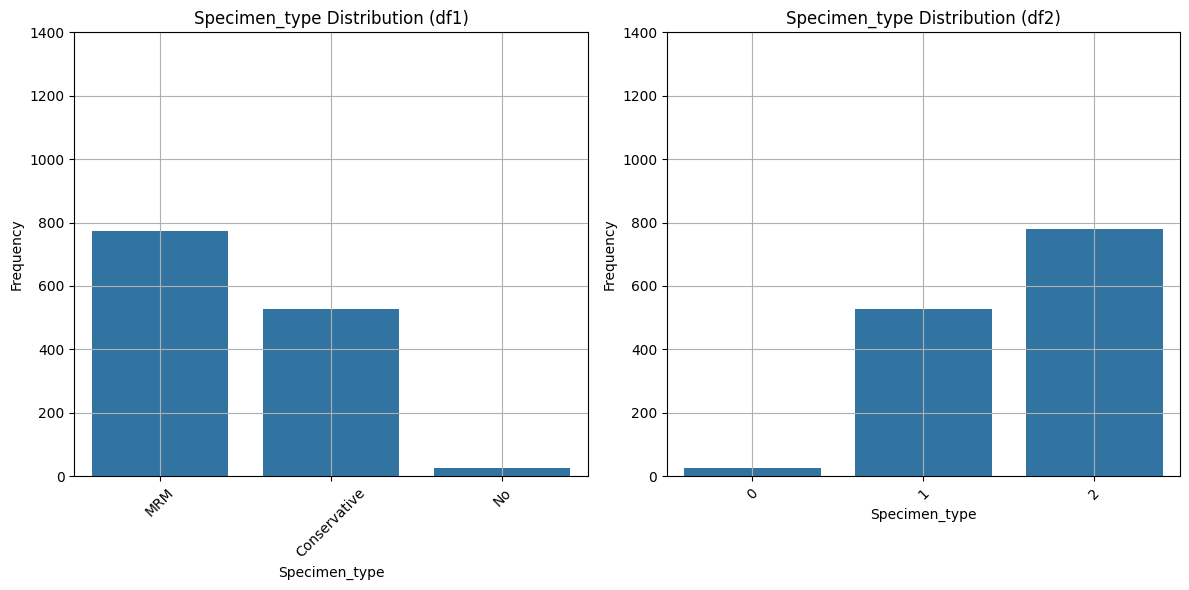

Missing Percentage in df1 for Specimen_type: 0.67%
Missing Percentage in df2 for Specimen_type: 0.00%


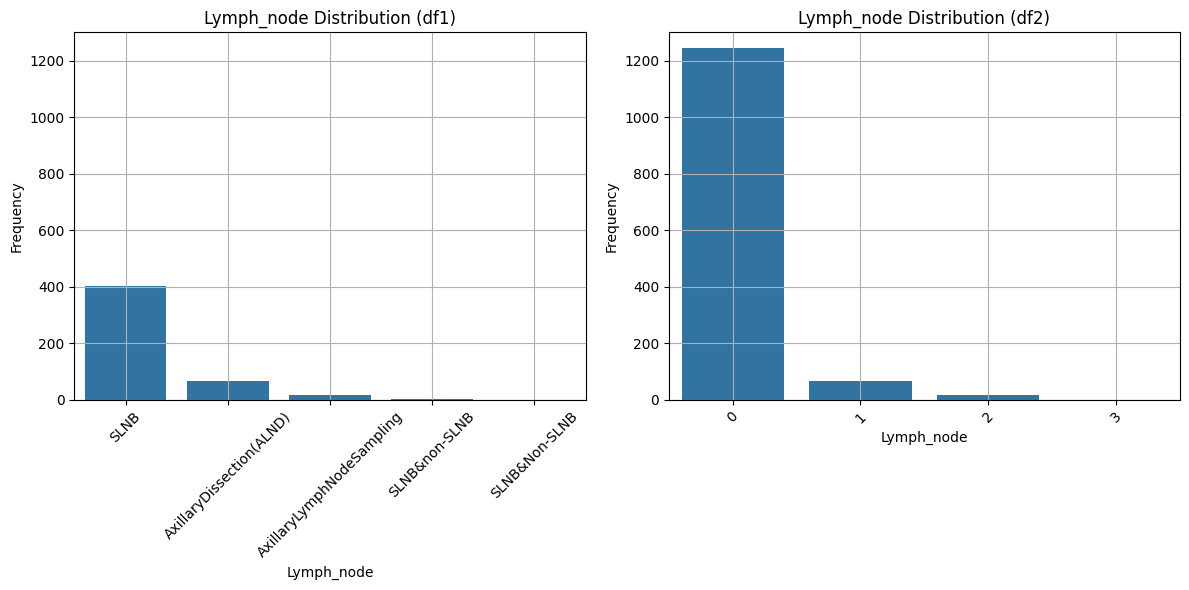

Missing Percentage in df1 for Lymph_node: 63.07%
Missing Percentage in df2 for Lymph_node: 0.00%


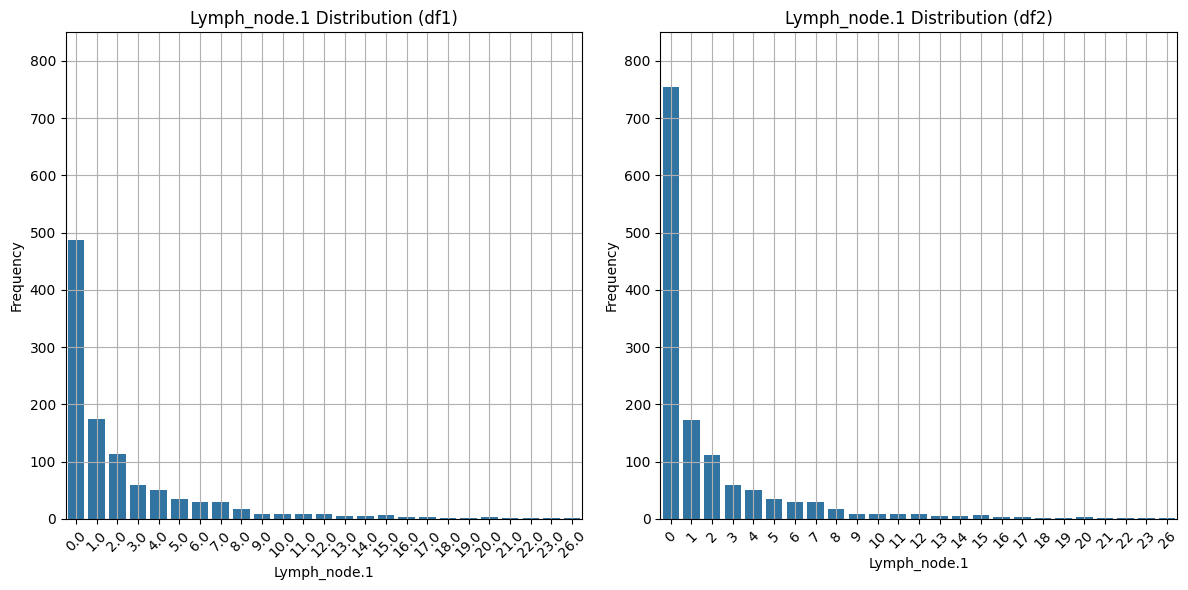

Missing Percentage in df1 for Lymph_node.1: 20.22%
Missing Percentage in df2 for Lymph_node.1: 0.00%


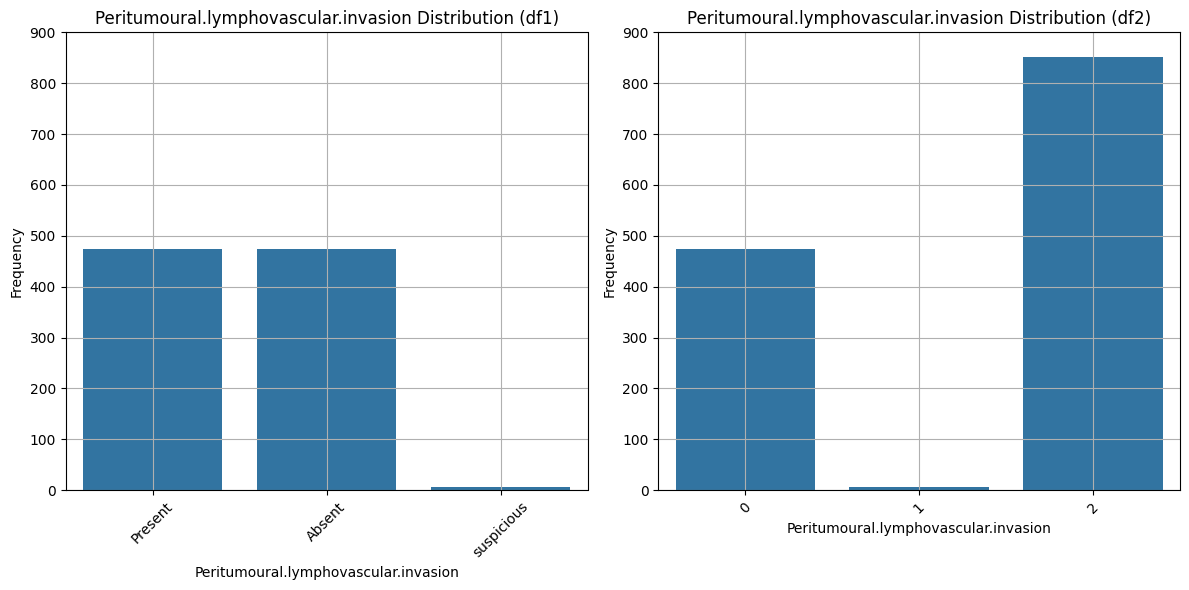

Missing Percentage in df1 for Peritumoural.lymphovascular.invasion: 28.39%
Missing Percentage in df2 for Peritumoural.lymphovascular.invasion: 0.00%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df1 and df2 are already loaded

# Features to plot and their corresponding y-axis limits
features_limits = {
    'Menopausal_status': 950,
    'T': 950,
    'N': 950,
    'Specimen_type': 1400,
    'Lymph_node': 1300,
    'Lymph_node.1': 850,
    'Peritumoural.lymphovascular.invasion': 900  # No specific limit for this feature
}

# Loop through each feature and create plots
for feature, ylim in features_limits.items():
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

    # Plot for df1
    sns.countplot(x=feature, data=df1, ax=axes[0])
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f'{feature} Distribution (df1)')
    axes[0].grid(True)
    axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
    if ylim:
        axes[0].set_ylim(0, ylim)  # Set y-axis limit if provided

    # Plot for df2
    sns.countplot(x=feature, data=df2, ax=axes[1])
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('Frequency')
    axes[1].set_title(f'{feature} Distribution (df2)')
    axes[1].grid(True)
    axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
    if ylim:
        axes[1].set_ylim(0, ylim)  # Set y-axis limit if provided

    # Adjust layout
    plt.tight_layout()

    # Show plots
    plt.show()

    # Calculate and display missing percentages
    missing_percentage_df1 = (df1[feature].isnull().sum() / len(df1)) * 100
    formatted_percentage_df1 = f'{missing_percentage_df1:.2f}%'
    print(f"Missing Percentage in df1 for {feature}: {formatted_percentage_df1}")

    missing_percentage_df2 = (df2[feature].isnull().sum() / len(df2)) * 100
    formatted_percentage_df2 = f'{missing_percentage_df2:.2f}%'
    print(f"Missing Percentage in df2 for {feature}: {formatted_percentage_df2}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

# Paths to the uploaded data
path_smote = '/content/imputed_data_smote_tomek.xlsx'
path_gan = '/content/lymphedema_balanced_gan.xlsx'

# Load the data
df_smote = pd.read_excel(path_smote)
df_gan = pd.read_excel(path_gan)

# Inspect shapes
print("SMOTE-Tomek dataset shape:", df_smote.shape)
print("GAN-balanced dataset shape:", df_gan.shape)

# Define X, y
y_smote = df_smote['lymphedema']
X_smote = df_smote.drop(columns=['lymphedema'])
y_gan = df_gan['lymphedema']
X_gan = df_gan.drop(columns=['lymphedema'])

# Determine cv splits: cannot exceed number of samples
n_samples_smote = len(df_smote)
n_splits = min(1000, n_samples_smote)

cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Scoring metrics
scoring = {'accuracy': 'accuracy',
           'sensitivity': 'recall',
           'roc_auc': 'roc_auc'}

# Cross-validate SMOTE dataset
scores_smote = cross_validate(clf, X_smote, y_smote, cv=cv, scoring=scoring, return_train_score=False, return_estimator=True)
# Cross-validate GAN dataset
scores_gan = cross_validate(clf, X_gan, y_gan, cv=cv, scoring=scoring, return_train_score=False, return_estimator=True)

# Aggregate results
results = pd.DataFrame({
    'Dataset': ['SMOTE-Tomek', 'GAN-Balanced'],
    'Accuracy Mean': [scores_smote['test_accuracy'].mean(), scores_gan['test_accuracy'].mean()],
    'Accuracy Std': [scores_smote['test_accuracy'].std(), scores_gan['test_accuracy'].std()],
    'Sensitivity Mean': [scores_smote['test_sensitivity'].mean(), scores_gan['test_sensitivity'].mean()],
    'Sensitivity Std': [scores_smote['test_sensitivity'].std(), scores_gan['test_sensitivity'].std()],
    'ROC AUC Mean': [scores_smote['test_roc_auc'].mean(), scores_gan['test_roc_auc'].mean()],
    'ROC AUC Std': [scores_smote['test_roc_auc'].std(), scores_gan['test_roc_auc'].std()]
})

In [ ]:
# print(results)
summary = pd.DataFrame({
    'Dataset': ['SMOTE‑Tomek', 'GAN‑Balanced'],
    'Accuracy μ±σ': [
        f"{scores_smote['test_accuracy'].mean():.3f} ± {scores_smote['test_accuracy'].std():.3f}",
        f"{scores_gan['test_accuracy'].mean():.3f} ± {scores_gan['test_accuracy'].std():.3f}"
    ],
    'Sensitivity μ±σ': [
        f"{scores_smote['test_sensitivity'].mean():.3f} ± {scores_smote['test_sensitivity'].std():.3f}",
        f"{scores_gan['test_sensitivity'].mean():.3f} ± {scores_gan['test_sensitivity'].std():.3f}"
    ],
    'ROC AUC μ±σ': [
        f"{scores_smote['test_roc_auc'].mean():.3f} ± {scores_smote['test_roc_auc'].std():.3f}",
        f"{scores_gan['test_roc_auc'].mean():.3f} ± {scores_gan['test_roc_auc'].std():.3f}"
    ]
})
print(summary.to_string(index=False))


In [ ]:

# # --- 8) Average Feature Importances ---
# def print_top_importances(estimators, feature_names, top_n=10):
#     # stack all importances: shape = (n_folds, n_features)
#     all_imps = np.vstack([est.feature_importances_ for est in estimators])
#     # mean importance per feature
#     mean_imps = all_imps.mean(axis=0)
#     # sort and print top_n
#     ranked = sorted(zip(feature_names, mean_imps), key=lambda x: x[1], reverse=True)
#     print(f"\nTop {top_n} features:")
#     for feat, imp in ranked[:top_n]:
#         print(f"  {feat}: {imp:.4f}")

# print("\nSMOTE‑Tomek Feature Importances:")
# print_top_importances(scores_smote['estimator'], X_smote.columns)

# print("\nGAN‑Balanced Feature Importances:")
# print_top_importances(scores_gan['estimator'], X_gan.columns)


# # --- 9) Aggregated Confusion Matrices via out‑of‑fold prediction ---
# print("\nConfusion Matrices (aggregated over 10 folds):")

# y_pred_smote = cross_val_predict(clf, X_smote, y_smote, cv=cv, n_jobs=-1)
# cm_smote = confusion_matrix(y_smote, y_pred_smote)
# print("\nSMOTE‑Tomek:\n", cm_smote)

# y_pred_gan = cross_val_predict(clf, X_gan, y_gan, cv=cv, n_jobs=-1)
# cm_gan = confusion_matrix(y_gan, y_pred_gan)
# print("\nGAN‑Balanced:\n", cm_gan)

In [ ]:
import pandas as pd
import numpy as np

# scikit‑learn imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report, confusion_matrix
)
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    recall_score,
    precision_score
)

In [ ]:
# 1) Load your two preprocessed files
df_smote = pd.read_excel('imputed_data_smote_tomek.xlsx')

# 1) Split 70% train / 30% validation
X = df_smote.drop(columns=["lymphedema"])
y = df_smote["lymphedema"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=42
)

# 2) Variable selection via LASSO (10‑fold CV)
lasso = LassoCV(cv=10, random_state=42, max_iter=1_000)
lasso.fit(X_train, y_train)

# keep only features with non‑zero coef
selected = X_train.columns[(lasso.coef_ != 0)]
print(f"Selected {len(selected)}/{X_train.shape[1]} features:", list(selected))

X_train_sel = X_train[selected]
X_val_sel   = X_val[selected]

# 3) Random Forest with hyperparameter tuning
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth":    [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10]
}


rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_sel, y_train)
best_rf = grid.best_estimator_
print("Best RF params:", grid.best_params_)

# 4) Performance on the 30% validation set
y_pred  = best_rf.predict(X_val_sel)
y_proba = best_rf.predict_proba(X_val_sel)[:, 1]

print("Validation Accuracy :", accuracy_score(y_val, y_pred))
print("Validation ROC AUC  :", roc_auc_score(y_val, y_proba))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

# 5) (Optional) Feature importances
importances = pd.Series(best_rf.feature_importances_, index=selected)
print("\nTop 10 importances:\n", importances.sort_values(ascending=False).head(10))

In [ ]:
# 1) Load your two preprocessed files
df_gan   = pd.read_excel('lymphedema_balanced_gan.xlsx')

# 1) Split 70% train / 30% validation
X = df_gan.drop(columns=["lymphedema"])
y = df_gan["lymphedema"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=42
)

# 2) Variable selection via LASSO (10‑fold CV)
lasso = LassoCV(cv=10, random_state=42, max_iter=1_000)
lasso.fit(X_train, y_train)

# keep only features with non‑zero coef
selected = X_train.columns[(lasso.coef_ != 0)]
print(f"Selected {len(selected)}/{X_train.shape[1]} features:", list(selected))

X_train_sel = X_train[selected]
X_val_sel   = X_val[selected]

# 3) Random Forest with hyperparameter tuning
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth":    [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_sel, y_train)
best_rf = grid.best_estimator_
print("Best RF params:", grid.best_params_)

# 4) Performance on the 30% validation set
y_pred  = best_rf.predict(X_val_sel)
y_proba = best_rf.predict_proba(X_val_sel)[:, 1]

print("Validation Accuracy :", accuracy_score(y_val, y_pred))
print("Validation ROC AUC  :", roc_auc_score(y_val, y_proba))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

# 5) (Optional) Feature importances
importances = pd.Series(best_rf.feature_importances_, index=selected)
print("\nTop 10 importances:\n", importances.sort_values(ascending=False).head(10))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_excel('imputed_data_smote_tomek.xlsx')

X = df.drop(columns=['lymphedema'])
y = df['lymphedema']

# 1) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 2) Build pipeline: scaling + LassoCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),           # scale features
    ('lasso', LassoCV(
        cv=5,                               # 5-fold CV
        n_alphas=100,                       # default # of αs
        max_iter=5000,                      # increase iterations if needed
        tol=1e-4,                           # convergence tolerance
        random_state=42,                    # reproducibility
        n_jobs=-1                          # parallelize across folds
    ))
])

# 3) Fit on training data
pipeline.fit(X_train, y_train)

# 4) Extract best α and coefficients
best_alpha = pipeline.named_steps['lasso'].alpha_
coef = pipeline.named_steps['lasso'].coef_
selected_features = X.columns[coef != 0]

print(f"Optimal alpha: {best_alpha:.5f}")
print(f"Nonzero coefficients ({len(selected_features)} features):")
print(selected_features.tolist())

# 5) Evaluate on test set
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)      # MSE on test set :contentReference[oaicite:8]{index=8}
r2  = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test R² : {r2:.4f}")

# Rank features by their absolute coefficient values
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coef[coef != 0]
})
feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("\nFeature Importance (ranked):")
print(feature_importance[['Feature', 'Coefficient']])




In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_excel('imputed_data_smote_tomek.xlsx')

# 1) Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)    # learn & apply scaling on train :contentReference[oaicite:3]{index=3}
X_test_scaled  = scaler.transform(X_test)         # apply same transform to test

# 2) Fit PCA to retain 95% of variance
pca = PCA(n_components=0.95, random_state=42)     # n_components as float ⇒ percentage of variance :contentReference[oaicite:4]{index=4}
X_train_pca = pca.fit_transform(X_train_scaled)    # fit on train
X_test_pca  = pca.transform(X_test_scaled)         # project test onto same components

# 3) Print PCA summary
print(f"Number of components selected: {pca.n_components_}")
print("Explained variance ratio per component:")
print(pca.explained_variance_ratio_)
print("Cumulative explained variance:")
print(np.cumsum(pca.explained_variance_ratio_))

# 4) Scree plot: individual vs. cumulative explained variance
plt.figure(figsize=(8,5))
# Bar chart for each component's variance
plt.bar(
    range(1, len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_,
    alpha=0.7,
    label='Individual explained variance'
)
# Step chart for cumulative variance
plt.step(
    range(1, len(pca.explained_variance_ratio_)+1),
    np.cumsum(pca.explained_variance_ratio_),
    where='mid',
    label='Cumulative explained variance'
)
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
!pip install xgboost

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

param_grid = [
    {
        'classifier': [LogisticRegression(max_iter=1000)],
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs']
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [5, 10],
        'classifier__criterion': ['gini', 'entropy']
    },
    {
        'classifier': [GradientBoostingClassifier()],
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [3, 5]
    },
    {
        'classifier': [SVC()],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale', 'auto']
    },
    {
        'classifier': [XGBClassifier(use_label_encoder=False, eval_metric='logloss')],
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [3, 5]
    }
]

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best model:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)


In [ ]:

import pandas as pd
import numpy as np
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import (
    accuracy_score, recall_score, precision_score,
    f1_score, roc_auc_score, make_scorer
)
from sklearn.linear_model    import LogisticRegression
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm             import SVC
from sklearn.neural_network  import MLPClassifier
from xgboost                 import XGBClassifier

# --- assume X_train, X_test, y_train, y_test already defined ---

# 1. Custom scorer
def balanced_score(y_true, y_pred):
    return (accuracy_score(y_true, y_pred) + recall_score(y_true, y_pred)) / 2
scorer = make_scorer(balanced_score)

# 2. Models + their grids (note keys are already "clf__param")
models = [
    ("LogisticRegression",
     LogisticRegression(max_iter=1000, class_weight='balanced'),
     {"clf__C": [0.01, 0.1, 1, 10]}),

    ("DecisionTree",
     DecisionTreeClassifier(class_weight='balanced'),
     {"clf__max_depth": [None, 5, 10],
      "clf__min_samples_leaf": [1, 5, 10]}),

    ("RandomForest",
     RandomForestClassifier(class_weight='balanced'),
     {"clf__n_estimators": [100, 200],
      "clf__max_depth": [None, 10],
      "clf__max_features": ["sqrt", "log2"]}),

    ("GradientBoosting",
     GradientBoostingClassifier(),
     {"clf__n_estimators": [100, 200],
      "clf__learning_rate": [0.01, 0.1],
      "clf__max_depth": [3, 5]}),

    ("SVC",
     SVC(probability=True, class_weight='balanced'),
     {"clf__C": [0.1, 1, 10],
      "clf__kernel": ["rbf", "linear"],
      "clf__gamma": ["scale", "auto"]}),

    ("XGBoost",
     XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                   scale_pos_weight=np.bincount(y_train)[0] / np.bincount(y_train)[1]),
     {"clf__n_estimators": [100, 200],
      "clf__learning_rate": [0.01, 0.1],
      "clf__max_depth": [3, 5]}),

    ("MLP",
     MLPClassifier(max_iter=500),
     {"clf__hidden_layer_sizes": [(50,), (100,)],
      "clf__activation": ["relu", "tanh"],
      "clf__alpha": [1e-4, 1e-3],
      "clf__learning_rate_init": [1e-3, 1e-2]})
]

# 3. Container for results
results = []

# 4. Loop & GridSearch
for name, estimator, grid in models:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", estimator)
    ])
    gs = GridSearchCV(
        pipe,
        param_grid=grid,      # <— only one param_grid here
        cv=5,
        scoring=scorer,
        n_jobs=-1,
        verbose=1
    )
    gs.fit(X_train, y_train)

    best = gs.best_estimator_
    y_pred = best.predict(X_test)
    y_prob = best.predict_proba(X_test)[:,1] if hasattr(best, "predict_proba") else None

    results.append({
        "Model": name,
        "Best Params": gs.best_params_,
        "CV Balanced Score": gs.best_score_,
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Test Recall": recall_score(y_test, y_pred),
        "Test Precision": precision_score(y_test, y_pred),
        "Test F1": f1_score(y_test, y_pred),
        "Test ROC AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    })

# 5. Summary
df_results = pd.DataFrame(results).sort_values("Test F1", ascending=False)
print(df_results.to_string(index=False))


In [ ]:
# Use the best model from grid search
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
import joblib

# Save the trained Random Forest model
joblib.dump(best_rf, 'random_forest_model.pkl')


In [ ]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import StratifiedKFold, cross_validate
# from sklearn.tree import export_text

# # Path to your already–SMOTEd data
# path_smote = '/content/imputed_data_smote_tomek.xlsx'

# # Load the data
# df_smote = pd.read_excel(path_smote)
# print("SMOTE-Tomek dataset shape:", df_smote.shape)

# # Define X, y
# y_smote = df_smote['lymphedema']
# X_smote = df_smote.drop(columns=['lymphedema'])

# # Determine cv splits: cannot exceed number of samples
# n_samples_smote = len(df_smote)
# n_splits = min(1000, n_samples_smote)
# cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# # Define classifier
# clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# # Scoring metrics
# scoring = {
#     'accuracy': 'accuracy',
#     'sensitivity': 'recall',
#     'roc_auc': 'roc_auc'
# }

# # Cross-validate SMOTE dataset, saving the fitted estimators
# scores_smote = cross_validate(
#     clf, X_smote, y_smote,
#     cv=cv,
#     scoring=scoring,
#     return_train_score=False,
#     return_estimator=True
# )

# # Print performance summary
# import numpy as np
# summary = pd.DataFrame({
#     'Dataset': ['SMOTE-Tomek'],
#     'Accuracy μ±σ': [
#         f"{scores_smote['test_accuracy'].mean():.3f} ± {scores_smote['test_accuracy'].std():.3f}"
#     ],
#     'Sensitivity μ±σ': [
#         f"{scores_smote['test_sensitivity'].mean():.3f} ± {scores_smote['test_sensitivity'].std():.3f}"
#     ],
#     'ROC AUC μ±σ': [
#         f"{scores_smote['test_roc_auc'].mean():.3f} ± {scores_smote['test_roc_auc'].std():.3f}"
#     ]
# })
# print(summary.to_string(index=False))

# # 4. Save the trained model to disk
# model_path = 'rf_lymphedema_model.joblib'
# joblib.dump(clf, model_path)
# print(f"Model saved to {model_path}")


# # # Extract one of the trained trees (e.g. the first fold’s estimator)
# # trained_rf = scores_smote['estimator'][0]

# # # Print the hyperparameters of the final RF
# # print("\nFinal RandomForest parameters:")
# # for param, val in trained_rf.get_params().items():
# #     print(f"  {param}: {val}")

# # # Print the “equation” (decision rules) of one tree in the forest
# # print("\nDecision rules for tree #1 in the forest:\n")
# # tree_rules = export_text(
# #     trained_rf.estimators_[0],
# #     feature_names=list(X_smote.columns),
# #     show_weights=True
# # )
# # print(tree_rules)


In [ ]:
# # 2. Imports
# import cudf                              # cuDF: GPU DataFrame with Pandas API :contentReference[oaicite:1]{index=1}
# import pandas as pd                     # for summary table only
# import numpy as np                      # for summary calculations

# from cuml.ensemble import RandomForestClassifier  # GPU-accelerated RF :contentReference[oaicite:2]{index=2}
# from sklearn.model_selection import StratifiedKFold, cross_validate
# import joblib                            # model persistence works seamlessly with cuML :contentReference[oaicite:3]{index=3}
# # 3. Load with pandas → convert to cuDF
# path_smote = '/content/imputed_data_smote_tomek.xlsx'
# df_smote = pd.read_excel(path_smote)              # read Excel on CPU
# gdf = cudf.from_pandas(df_smote)                  # move to GPU
# print("SMOTE-Tomek dataset shape:", gdf.shape)

# # # 3. Load your SMOTE-processed data into cuDF
# # path_smote = '/content/imputed_data_smote_tomek.xlsx'
# # gdf = cudf.read_excel(path_smote)        # zero-code-change to cuDF I/O :contentReference[oaicite:4]{index=4}
# # print("SMOTE-Tomek dataset shape:", gdf.shape)

# y = gdf['lymphedema'].astype('int32')    # cuDF column → integer target
# X = gdf.drop(columns=['lymphedema'])
# # 4. Set up Stratified K-Fold (unchanged logic)
# n_samples = len(gdf)
# n_splits = min(1000, n_samples)
# cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
# # 5. Instantiate GPU RandomForest
# clf = RandomForestClassifier(
#     n_estimators=100,
#     random_state=42
# )  # cuML’s RF builds all trees on the GPU in parallel :contentReference[oaicite:5]{index=5}

# scoring = {
#     'accuracy': 'accuracy',
#     'sensitivity': 'recall',
#     'roc_auc': 'roc_auc'
# }

# # 6. Cross-validate on GPU
# scores = cross_validate(
#     clf, X, y,
#     cv=cv,
#     scoring=scoring,
#     return_train_score=False,
#     return_estimator=True
# )
# # 7. Summarize results (off-GPU, small overhead)
# summary = pd.DataFrame({
#     'Dataset': ['SMOTE-Tomek'],
#     'Accuracy μ±σ': [f"{scores['test_accuracy'].mean():.3f} ± {scores['test_accuracy'].std():.3f}"],
#     'Sensitivity μ±σ': [f"{scores['test_sensitivity'].mean():.3f} ± {scores['test_sensitivity'].std():.3f}"],
#     'ROC AUC μ±σ': [f"{scores['test_roc_auc'].mean():.3f} ± {scores['test_roc_auc'].std():.3f}"]
# })
# print(summary.to_string(index=False))
# # 8. Save the first fold’s trained GPU model for reuse
# model_path = 'rf_lymphedema_gpu.joblib'
# joblib.dump(scores['estimator'][0], model_path)
# print(f"Model saved to {model_path}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
import joblib

# Path to your SMOTE-processed data
path_smote = '/content/imputed_data_smote_tomek.xlsx'

# Load the data
df_smote = pd.read_excel(path_smote)
print("SMOTE-Tomek dataset shape:", df_smote.shape)

# Define X, y
y_smote = df_smote['lymphedema']
X_smote = df_smote.drop(columns=['lymphedema'])

# Determine cv splits: cannot exceed number of samples
n_samples_smote = len(df_smote)
n_splits = min(1000, n_samples_smote)

cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'sensitivity': 'recall',
    'roc_auc': 'roc_auc'
}

# Cross-validate SMOTE dataset
scores_smote = cross_validate(
    clf,
    X_smote,
    y_smote,
    cv=cv,
    scoring=scoring,
    return_train_score=False,
    return_estimator=True
)

# Print performance summary
summary = pd.DataFrame({
    'Dataset': ['SMOTE-Tomek'],
    'Accuracy μ±σ': [
        f"{scores_smote['test_accuracy'].mean():.3f} ± {scores_smote['test_accuracy'].std():.3f}"
    ],
    'Sensitivity μ±σ': [
        f"{scores_smote['test_sensitivity'].mean():.3f} ± {scores_smote['test_sensitivity'].std():.3f}"
    ],
    'ROC AUC μ±σ': [
        f"{scores_smote['test_roc_auc'].mean():.3f} ± {scores_smote['test_roc_auc'].std():.3f}"
    ]
})
print(summary.to_string(index=False))

# Persist the first fold’s model for later inference
model_path = 'rf_lymphedema_model.joblib'
joblib.dump(scores_smote['estimator'][0], model_path)
print(f"Model saved to {model_path}")